
## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### Plotting Helper Function 

In [5]:
import numpy as np
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

## Load The Data

In [6]:
# Load pickled data
import pickle

# File Paths
training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '..//data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(y_valid))
assert(len(x_test) == len(y_test))

print('SUCCESS: Data has been loaded')

SUCCESS: Data has been loaded



## Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [7]:
# Number of training examples
n_train = len(x_train)

# Number of validation examples
n_validation = len(x_valid)

# Number of testing examples
n_test = len(x_test)

# Shape of a traffic sign image
image_shape = x_train[0].shape

# Unique classes/labels in the dataset
unique_classes, n_samples = np.unique(y_train, 
                                      return_index=False, 
                                      return_inverse=False,
                                      return_counts=True)
n_classes = len(unique_classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the data

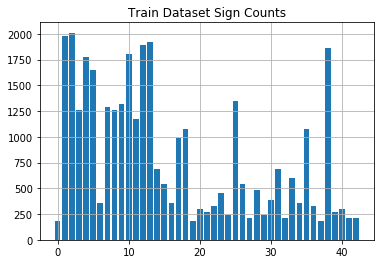

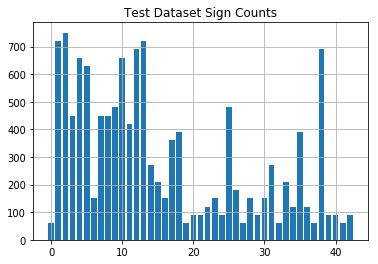

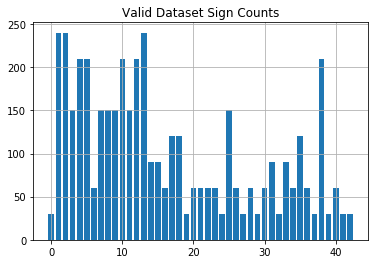

In [9]:
import matplotlib.pyplot as plt

unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()

The training data consists of 34,799 pictures. Each picture is 32x32 pixels and also has an associated number label. These number labels can be looked up with their generic name in the signnames.csv file. For example, 2 is assocated with the sign "50 speed limit". An example of the data is given below:   

4


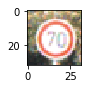

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Design and Test a Model Architecture

In [8]:
def preProcess(color_images):
    # grayscale
    grayscaled_images = np.sum(color_images/3, axis=3, keepdims=True)
    
    # normalize
    normalized_images = (grayscaled_images - 128) / 128
    
    
    return normalized_images

In [9]:

x_train = preProcess(x_train)
x_valid = preProcess(x_valid)
x_test = preProcess(x_test)

print("SUCCESS: Preprocessing results:")
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

SUCCESS: Preprocessing results:
(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Shuffle the Data Set

In [10]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
print("SUCCESS: Training data has been shuffled")

SUCCESS: Training data has been shuffled


### Setup TensorFlow

In [11]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

### Model Architecture

Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6

Activation : RELU

Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10

Activation : RELU

Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16

Activation : RELU

Pooling stage - Input = 8x8x16. Output = 4x4x16

Flatten stage - Input = 4x4x16. Output = 256

Layer 4: Fully Connected. Input = 256. Output = 120

Activation : RELU

Dropout stage

Layer 5: Fully Connected. Input = 120. Output = 100

Activation : RELU

Layer 6: Fully Connected. Input = 100. Output = 84

Activation stage : RELU

Layer 7: Fully Connected. Input = 84. Output = 43

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation stage - RELU
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,10), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(10))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides=[1,2,2,1],padding='VALID',use_cudnn_on_gpu=True) + conv2_b
    
    # Activation stage - RELU
    conv2 = tf.nn.relu(conv2)
    
    # Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5,5,10,16),mean=mu,stddev=sigma))
    conv3_b =tf.Variable(tf.zeros(16))
    conv3 = tf.nn.conv2d(conv2,conv3_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv3_b
    
    # Activation stage - RELU
    conv3 = tf.nn.relu(conv3)

    # Pooling stage - Input = 8x8x16. Output = 4x4x16.
    conv3= tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Flatten stage - Input = 4x4x16. Output = 256.
    f = flatten(conv3)

    # Layer 4: Fully Connected. Input = 256. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(int(np.shape(f)[1]),120),mean=mu,stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(shape=120))
    fc1 = tf.matmul(f,fc1_W) + fc1_b
    
    # Activation stage - RELU
    fc1= tf.nn.relu(fc1)
    
    # Dropout stage
    fc1 = tf.nn.dropout(fc1, dropout_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 100.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,100),mean=mu,stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    
    # Activation stage - RELU
    fc2= tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 100. Output = 84.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(100,84),mean=mu,stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(84))
    fc3= tf.matmul(fc2,fc3_W) + fc3_b
    
    # Activation stage - RELU
    fc3= tf.nn.relu(fc3)
    
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc4_W= tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc4_b= tf.Variable(tf.zeros(43))
    fc4= tf.matmul(fc3,fc4_W) + fc4_b
    logits = fc4
        
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [14]:
rate = 0.0009 # learning rate

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:0.5})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.717

EPOCH 2 ...
Validation Accuracy = 0.829

EPOCH 3 ...
Validation Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.919

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.944

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.954

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.957

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.959

EPOCH 22 ...
Validation Accuracy = 0.966

EPOCH 23 ...
Validation Accuracy = 0.958

EPOCH 24 ...
Validation Accura

### Model Evaluation

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.952


## Testing the Model on New Images

New random traffic signs downloaded from the web to test how accurate the model functions.

### Load and Output the Images

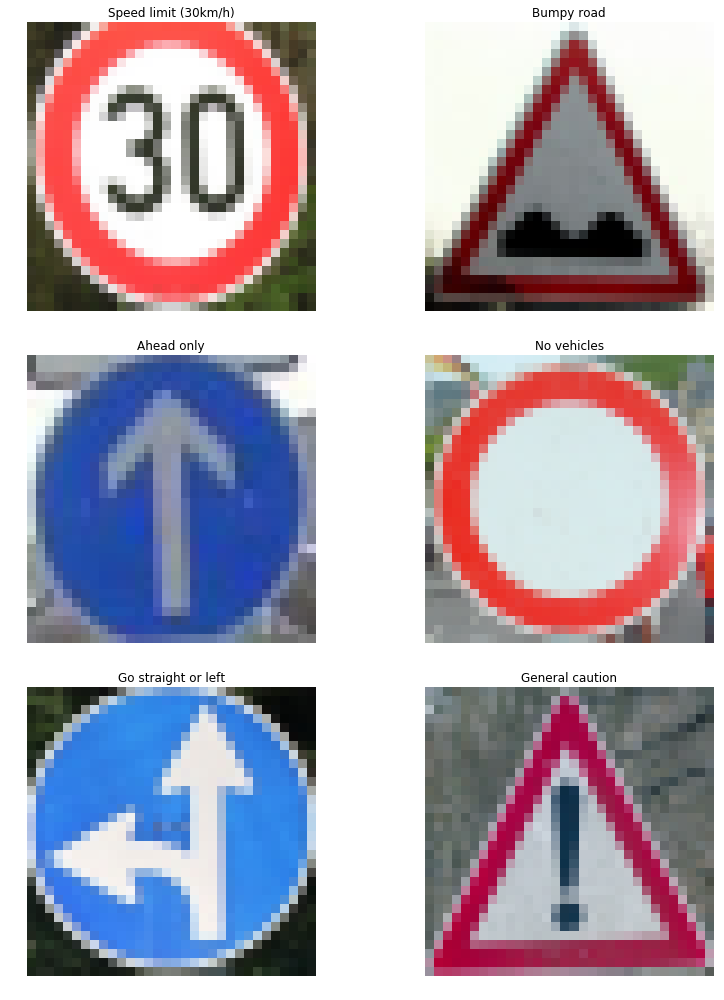

In [27]:
import numpy as np
import glob
import cv2

new_images = sorted(glob.glob('../new_traffic_images/img*.png'))
new_labels = np.array([1, 22, 35, 15, 37, 18])

figures = {}
labels = {}
new_signs = []
i = 0
for image in new_images:
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    # assign indexes to images and labels
    new_signs.append(img)
    figures[i] = img
    labels[i] = name_values[new_labels[i]][1].decode('ascii')
    i += 1;

plot_figures(figures, 3, 2, labels)

In [28]:
new_signs = np.array(new_signs)
processed_signs = preProcess(new_signs)
print(processed_signs.shape)

(6, 32, 32, 1)


### Predict the Sign Type for Each Image

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    output_accuracy = evaluate(processed_signs, new_labels)
    print("Test Accuracy = {:.3f}".format(output_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Analyze Perfomance 

In [31]:
single_figure_array = []
single_label_array = []

for i in range(6):
    single_figure_array.append(processed_signs[i])
    single_label_array.append(new_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        accuracy = evaluate(single_figure_array, single_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 6
Image Accuracy = 1.000



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet


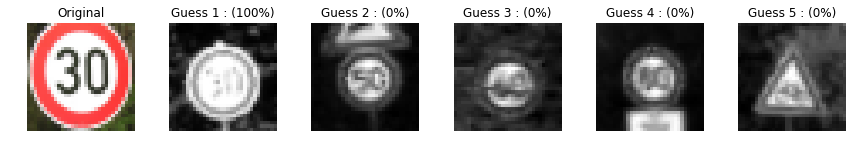

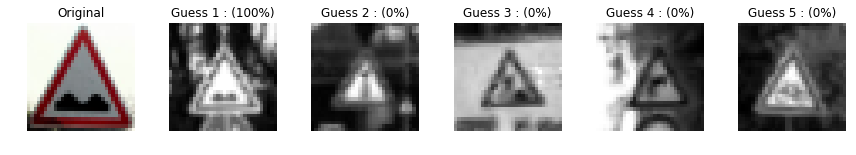

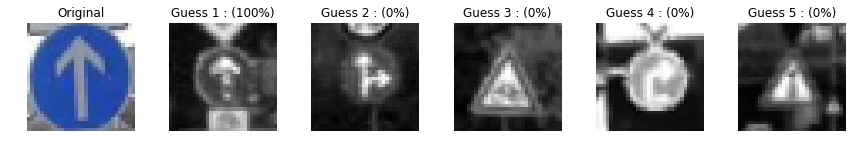

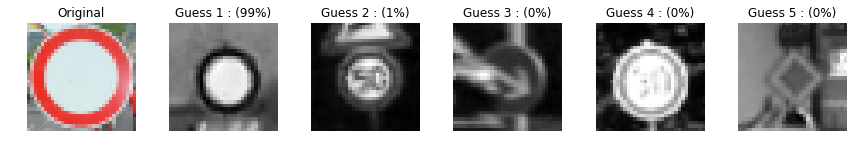

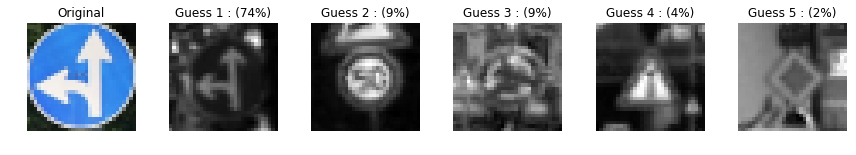

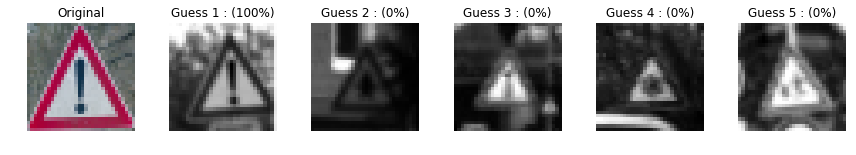

In [33]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    softmax_logits = sess.run(softmax_logits, feed_dict={x: processed_signs, dropout_prob:1.0})
    top_k = sess.run(top_k, feed_dict={x: processed_signs, dropout_prob:1.0})

    for i in range(6):
        figures = {}
        labels = {}
        
        figures[0] = new_signs[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*top_k[0][i][j])
            figures[j+1] = x_valid[np.argwhere(y_valid == top_k[1][i][j])[0]].squeeze()
            
        plot_figures(figures, 1, 6, labels)